In [1]:
import pandas as pd
import numpy as np
import pm4py

# Question 1

 <font size="6">1b</font>

In [2]:
# Import the log
log = pm4py.read_xes("loanApplications.xes.gz")

parsing log, completed traces ::   0%|          | 0/29067 [00:00<?, ?it/s]

In [3]:
num_traces = len(log) # Number of traces in the log
# Cases of successful applications
log_successful = pm4py.filter_event_attribute_values(log, "concept:name", ["A_Pending"], level="case", retain=True)
num_traces_successful = len(log_successful)
print(f"Ratio of sucessful applications: {num_traces_successful/num_traces*100}%")

Ratio of sucessful applications: 54.74249148518939%


In [4]:
# Cases of unsuccessful applications
log_unsuccessful = pm4py.filter_event_attribute_values(log, "concept:name", ["A_Denied", "A_Cancelled"], level="case", retain=True)
num_traces_unsuccessful = len(log_unsuccessful)
print(f"Ratio of unsucessful applications: {num_traces_unsuccessful/num_traces*100}%")

Ratio of unsucessful applications: 44.944438710565244%


In [5]:
# Helper function to inspect attribute values 
def inspect_attribute(log, log_successful, attribute):
    columns = [attribute, "num_cases", "successful_ratio_percentage"]
    data = []
    # Get all attribute values
    att_values = pm4py.get_trace_attribute_values(log, attribute)
    att_values_successful = pm4py.get_trace_attribute_values(log_successful, attribute)
    # Calculate num cases and successful ratio for each attribute value
    for val in att_values:
        num_traces_val = att_values[val]
        num_traces_val_successful = att_values_successful.get(val, 0)
        data.append([val, num_traces_val, num_traces_val_successful/num_traces_val*100])
    # Return a result table
    df = pd.DataFrame(columns=columns, data=data)
    return df

In [6]:
# Inspect ApplicationType
inspect_attribute(log, log_successful, "ApplicationType")

,ApplicationType,num_cases,successful_ratio_percentage
0,New credit,25939,52.511662
1,Limit raise,3128,73.241688


In [7]:
# Inspect LoanGoal
inspect_attribute(log, log_successful, "LoanGoal")

,LoanGoal,num_cases,successful_ratio_percentage
0,Existing loan takeover,5160,55.019380
1,Home improvement,7086,58.777872
2,Car,8569,51.184502
3,"Other, see explanation",2763,50.922910
4,Remaining debt home,792,64.520202
5,Not speficied,989,41.051567
6,Unknown,2165,63.510393
7,Caravan / Camper,351,57.834758
8,Tax payments,141,48.936170
9,Extra spending limit,585,53.333333


In [8]:
# Number of offers created
activities = pm4py.get_event_attribute_values(log, "concept:name")
print(f"The number of offers created in L is {activities['O_Create Offer']}.")

The number of offers created in L is 39758.


In [9]:
# Cases where O_Create Offer happened at least twice
log_repeated_offers = pm4py.filter_activities_rework(log, "O_Create Offer", 2)
print(len(log_repeated_offers))
print(f"The ratio of applications with more than one loan offer is {len(log_repeated_offers)/num_traces*100}%")

7936
The ratio of applications with more than one loan offer is 27.302439192211096%


In [10]:
# Refused offers
print(f"The number of refused offers in L is {activities['O_Refused']}.")
print(f"The ratio of refused offers is {activities['O_Refused']/activities['O_Create Offer']*100}%.")

The number of refused offers in L is 4307.
The ratio of refused offers is 10.833039891342624%.


 <font size="6">1c</font>

In [13]:
# Creating L_sparse
# L_sparse containing cases between 30d8h53m24s and 34h9h12m5s
log_sparse = pm4py.filter_case_performance(log, 30*24*60*60 + 8*60*60 + 53*60 + 24, 34*24*60*60 + 9*60*60 + 12*60 + 5)
pm4py.write_xes(log_sparse, 'log_sparse.xes')

exporting log, completed traces ::   0%|          | 0/6751 [00:00<?, ?it/s]

 <font size="6">1d</font>

In [26]:
# End activities in L
end_activities = pm4py.get_end_activities(log)
end_activities

{'W_Validate application': 11643,
 'O_Cancelled': 4120,
 'W_Call after offers': 8722,
 'W_Call incomplete files': 4320,
 'W_Complete application': 134,
 'W_Assess potential fraud': 97,
 'W_Personal Loan collection': 2,
 'W_Shortened completion': 5,
 'A_Denied': 1,
 'O_Sent (online only)': 8,
 'O_Sent (mail and online)': 14,
 'O_Returned': 1}

In [32]:
# Creating L_complete
allowed_end_acts = set([key for key in end_activities]) - set(["O_Sent (online only)", "O_Sent (mail and online)", "O_Returned"])
log_1 = pm4py.filter_event_attribute_values(log, "concept:name", ["A_Pending", "A_Denied", "A_Cancelled"], level="case", retain=True)
log_complete = pm4py.filter_end_activities(log_1, list(allowed_end_acts))
pm4py.write_xes(log_complete, 'log_complete.xes')

exporting log, completed traces ::   0%|          | 0/28976 [00:00<?, ?it/s]

In [33]:
pm4py.get_event_attribute_values(log, "concept:name")

{'A_Create Application': 29067,
 'A_Submitted': 18830,
 'W_Handle leads': 43628,
 'W_Complete application': 137395,
 'A_Concept': 29067,
 'A_Accepted': 29067,
 'O_Create Offer': 39758,
 'O_Created': 39758,
 'O_Sent (mail and online)': 36681,
 'W_Call after offers': 176422,
 'A_Complete': 28930,
 'W_Validate application': 193107,
 'A_Validating': 35838,
 'O_Returned': 21498,
 'W_Call incomplete files': 155930,
 'A_Incomplete': 21314,
 'O_Accepted': 15912,
 'A_Pending': 15912,
 'A_Denied': 3440,
 'O_Refused': 4307,
 'O_Cancelled': 19376,
 'A_Cancelled': 9625,
 'O_Sent (online only)': 1880,
 'W_Assess potential fraud': 3048,
 'W_Personal Loan collection': 22,
 'W_Shortened completion': 220}

# Question 2

 <font size="6">2a</font>

In [2]:
log_2a = pm4py.read_xes('loanApplicationsFiltered.xes.gz')

parsing log, completed traces ::   0%|          | 0/28976 [00:00<?, ?it/s]

In [3]:
import re

activities = list(pm4py.get_event_attribute_values(log_2a, "concept:name").keys())


def get_all_activities_by_types(type='A'):
    res = []
    regex = '^A_.*'
    if type == 'W':
        regex = '^W_.*'
    elif type == 'O':
        regex = '^O_.*'
    for act in activities:
        if re.match(regex, act):
            res.append(act)
    return res


A_activites = get_all_activities_by_types()
W_activites = get_all_activities_by_types('W')
O_activites = get_all_activities_by_types('O')

In [4]:
L_A = pm4py.filter_event_attribute_values(log_2a, 'concept:name', A_activites, level='event', retain=True)
L_W = pm4py.filter_event_attribute_values(log_2a, 'concept:name', W_activites, level='event', retain=True)
L_O = pm4py.filter_event_attribute_values(log_2a, 'concept:name', O_activites, level='event', retain=True)

In [5]:
def get_basic_stats(log):
    number_of_case = len(log)
    variants = pm4py.get_variants_as_tuples(log)
    number_of_variant = len(variants)
    number_of_event = 0
    for t in log:
        number_of_event += len(t)
    avg_number_of_event_per_trace = number_of_event / len(log)
    number_of_distinct_activities = len(list(pm4py.get_event_attribute_values(log, "concept:name").keys()))
    return {
        'number_of_case': number_of_case,
        'number_of_variant': number_of_variant,
        'number_of_event': number_of_event,
        'avg_number_of_event_per_trace': avg_number_of_event_per_trace,
        'number_of_distinct_activities': number_of_distinct_activities
    }


In [6]:
L_A_stats = get_basic_stats(L_A)
L_W_stats = get_basic_stats(L_W)
L_O_stats = get_basic_stats(L_O)
logs_2a_stats = pd.DataFrame([L_A_stats, L_W_stats, L_O_stats], index=['A', 'W', 'O'])
logs_2a_stats

,number_of_case,number_of_variant,number_of_event,avg_number_of_event_per_trace,number_of_distinct_activities
A,28976,88,220481,7.609090,10
W,28976,1018,175545,6.058290,6
O,28976,815,178612,6.164136,8


<font size="6">2b</font>

In [7]:
L_Os = pm4py.read_xes('./loanOffers.xes.gz')


parsing log, completed traces ::   0%|          | 0/39589 [00:00<?, ?it/s]

In [8]:
import os
if not os.path.exists('./xes'):
    os.mkdir('./xes')
pm4py.write_xes(L_O, './xes/2aO.xes')

exporting log, completed traces ::   0%|          | 0/28976 [00:00<?, ?it/s]

<font size="6">2c</font>

In [6]:
from pm4py.algo.conformance.alignments.petri_net import algorithm as alignments
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator


def fitness_and_precision_calculator(net, initial_marking, final_marking, log_to_apply):
    try:
        aligned_traces_IM = alignments.apply_log(log_to_apply, net, initial_marking, final_marking)
        for alignment in aligned_traces_IM:
            if alignment['cost'] > 10:
                x = 3
        fitness_alignment_IM = replay_fitness.evaluate(aligned_traces_IM, variant=replay_fitness.Variants.ALIGNMENT_BASED)
        precision_alignment_IM = precision_evaluator.apply(log_to_apply, net, initial_marking, final_marking,
                                                           variant=precision_evaluator.Variants.ALIGN_ETCONFORMANCE)
    except:
        fitness_alignment_IM = {'percFitTraces': 0, 'averageFitness': 0, 'percentage_of_fitting_traces': 0, 'average_trace_fitness': 0}
        precision_alignment_IM = 0
    replayed_traces_IM = token_replay.apply(log_to_apply, net, initial_marking, final_marking)
    fitness_token_replay_IM = replay_fitness.evaluate(replayed_traces_IM, variant=replay_fitness.Variants.TOKEN_BASED)
    precision_token_replay_IM = precision_evaluator.apply(log_to_apply, net, initial_marking, final_marking,
                                                          variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)

    return {
        'perc_fit_trace (alignment)': fitness_alignment_IM['percentage_of_fitting_traces'],
        'perc_fit_trace (token replay)': fitness_token_replay_IM['percentage_of_fitting_traces'],
        'average_fitness (alignment)': fitness_alignment_IM['average_trace_fitness'],
        'average_fitness (token replay)': fitness_token_replay_IM['average_trace_fitness'],
        'precision (alignment)': precision_alignment_IM,
        'precision (token replay)': precision_token_replay_IM,
    }


def simplicity_and_generalization_calculator(net, initial_marking, final_marking, log_to_apply):
    simplicity = simplicity_evaluator.apply(net)
    generalization = generalization_evaluator.apply(log_to_apply, net, initial_marking, final_marking)
    return simplicity, generalization

In [11]:
algos = ['alpha', 'im']
noise_thresholds = [0, 0.2, 0.5]
log_2c = [(L_A, 'A'), (L_W, 'W'), (L_Os, 'O')]
result_2c = {}
index_2c = []
for log in log_2c:
    pm4py.write_xes(log[0], f'./xes/L_{log[1]}.xes')
for log_to_apply in log_2c:
    for algo in algos:
        for threshold in noise_thresholds:
            net, initial_marking, final_marking = None, None, None
            if algo == 'alpha' and threshold == 0:
                net, initial_marking, final_marking = pm4py.discover_petri_net_alpha(log_to_apply[0])
            elif algo == 'im':
                net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(log_to_apply[0], threshold)
            else:
                continue

            pm4py.write_pnml(net, initial_marking, final_marking, f'./pnml/2c-{log_to_apply[1]}-{algo}-{threshold}.pnml')
            index_2c.append(f'{log_to_apply[1]}-{algo}-{threshold}')
            fitness_dict = fitness_and_precision_calculator(net, initial_marking, final_marking, log_to_apply[0])
            for key in fitness_dict:
                if key in result_2c:
                    result_2c[key].append(fitness_dict[key])
                else:
                    result_2c[key] = [fitness_dict[key]]

            simplicity, generalization = simplicity_and_generalization_calculator(net, initial_marking, final_marking, log_to_apply[0])
            if 'simplicity' in result_2c:
                result_2c['simplicity'].append(simplicity)
            else:
                result_2c['simplicity'] = [simplicity]

            if 'generalization' in result_2c:
                result_2c['generalization'].append(generalization)
            else:
                result_2c['generalization'] = [generalization]



exporting log, completed traces ::   0%|          | 0/28976 [00:00<?, ?it/s]

exporting log, completed traces ::   0%|          | 0/28976 [00:00<?, ?it/s]

exporting log, completed traces ::   0%|          | 0/39589 [00:00<?, ?it/s]

aligning log, completed variants ::   0%|          | 0/88 [00:00<?, ?it/s]

computing precision with alignments, completed variants ::   0%|          | 0/58 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/88 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/58 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/88 [00:00<?, ?it/s]

aligning log, completed variants ::   0%|          | 0/88 [00:00<?, ?it/s]

computing precision with alignments, completed variants ::   0%|          | 0/58 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/88 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/58 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/88 [00:00<?, ?it/s]

aligning log, completed variants ::   0%|          | 0/88 [00:00<?, ?it/s]

computing precision with alignments, completed variants ::   0%|          | 0/58 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/88 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/58 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/88 [00:00<?, ?it/s]

aligning log, completed variants ::   0%|          | 0/88 [00:00<?, ?it/s]

computing precision with alignments, completed variants ::   0%|          | 0/58 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/88 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/58 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/88 [00:00<?, ?it/s]

aligning log, completed variants ::   0%|          | 0/1018 [00:00<?, ?it/s]

computing precision with alignments, completed variants ::   0%|          | 0/1534 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/1018 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/1534 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/1018 [00:00<?, ?it/s]

aligning log, completed variants ::   0%|          | 0/1018 [00:00<?, ?it/s]

computing precision with alignments, completed variants ::   0%|          | 0/1534 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/1018 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/1534 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/1018 [00:00<?, ?it/s]

aligning log, completed variants ::   0%|          | 0/1018 [00:00<?, ?it/s]

computing precision with alignments, completed variants ::   0%|          | 0/1534 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/1018 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/1534 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/1018 [00:00<?, ?it/s]

aligning log, completed variants ::   0%|          | 0/1018 [00:00<?, ?it/s]

computing precision with alignments, completed variants ::   0%|          | 0/1534 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/1018 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/1534 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/1018 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/12 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/12 [00:00<?, ?it/s]

aligning log, completed variants ::   0%|          | 0/12 [00:00<?, ?it/s]

computing precision with alignments, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/12 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/12 [00:00<?, ?it/s]

aligning log, completed variants ::   0%|          | 0/12 [00:00<?, ?it/s]

computing precision with alignments, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/12 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/12 [00:00<?, ?it/s]

aligning log, completed variants ::   0%|          | 0/12 [00:00<?, ?it/s]

computing precision with alignments, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/12 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/12 [00:00<?, ?it/s]

In [13]:
df_stats_2c = pd.DataFrame(result_2c, index=index_2c)
df_stats_2c

,perc_fit_trace (alignment),perc_fit_trace (token replay),average_fitness (alignment),average_fitness (token replay),precision (alignment),precision (token replay),simplicity,generalization
A-alpha-0,23.840420,23.840420,0.877945,0.872103,0.426619,0.426619,1.000000,0.992186
A-im-0,100.000000,100.000000,1.000000,1.000000,0.853174,0.853174,0.714286,0.923102
A-im-0.2,99.527195,99.527195,0.999512,0.999346,0.925764,0.925764,0.735849,0.923466
A-im-0.5,12.703617,12.703617,0.900150,0.879231,0.978533,0.978533,0.800000,0.901125
W-alpha-0,0.062120,0.062120,0.426083,0.498860,0.313408,0.313408,1.000000,0.988321
W-im-0,100.000000,100.000000,1.000000,1.000000,0.507620,0.507620,0.677419,0.982717
W-im-0.2,99.927526,99.927526,0.999929,0.999971,0.552820,0.552820,0.694915,0.990756
W-im-0.5,24.679045,24.679045,0.868617,0.905827,0.707679,0.707679,0.725490,0.942955
O-alpha-0,0.000000,0.000000,0.000000,0.904405,0.000000,0.812486,0.555556,0.990546
O-im-0,100.000000,100.000000,1.000000,1.000000,0.780093,0.780093,0.666667,0.988802


<font size="6">2e</font>

In [40]:
net_2d_A, initial_marking_2d_A, final_marking_2d_A = pm4py.read_pnml('./pnml/2c-O-im-0.2.pnml')

In [42]:
try:
    aligned_traces_IM = alignments.apply_log(L_Os, net_2d_A, initial_marking_2d_A, final_marking_2d_A)
    for alignment in aligned_traces_IM:
        if alignment['cost'] >= 10000:
            for e in alignment['alignment']:
                print(f'{e[0]} ->', end=" ")
            break
    fitness_alignment_IM = replay_fitness.evaluate(aligned_traces_IM, variant=replay_fitness.Variants.ALIGNMENT_BASED)
    precision_alignment_IM = precision_evaluator.apply(L_A, net_2d_A, initial_marking_2d_A, final_marking_2d_A,
                                                       variant=precision_evaluator.Variants.ALIGN_ETCONFORMANCE)
except:
    fitness_alignment_IM = {'percFitTraces': 0, 'averageFitness': 0, 'percentage_of_fitting_traces': 0, 'average_trace_fitness': 0}
    precision_alignment_IM = 0

aligning log, completed variants ::   0%|          | 0/12 [00:00<?, ?it/s]

O_Create Offer -> O_Created -> >> -> >> -> O_Cancelled -> 

computing precision with alignments, completed variants ::   0%|          | 0/58 [00:00<?, ?it/s]

<font size="6">2f</font>

In [2]:
# Import filtered log
from pm4py.objects.log.obj import EventLog, Trace, Event
log_filtered = pm4py.read_xes("loanApplicationsFiltered.xes.gz")


parsing log, completed traces ::   0%|          | 0/28976 [00:00<?, ?it/s]

In [8]:
# Split the filtered log
log_prefix = EventLog()
log_suffix = EventLog()
trace_attributes = pm4py.get_trace_attributes(log_filtered)
print(trace_attributes)
for trace in log_filtered:
    append = "prefix"
    trace_prefix = Trace()
    trace_suffix = Trace()
    log_prefix.append(trace_prefix)
    log_suffix.append(trace_suffix)
    for att in trace_attributes:
        trace_prefix.attributes.update({att: trace.attributes.get(att)})
        trace_suffix.attributes.update({att: trace.attributes.get(att)})
    for i in range(0,len(trace)):
        if append == "prefix":
            trace_prefix.append(trace[i])
        else:
            trace_suffix.append(trace[i])
        if trace[i]['concept:name'] == 'A_Accepted':
            append = "suffix"
print(len(log_prefix))
print(len(log_suffix))
pm4py.write_xes(log_prefix, 'log_prefix.xes')
pm4py.write_xes(log_suffix, 'log_suffix.xes')

['LoanGoal', 'variant', 'creator', 'RequestedAmount', 'variant-index', 'ApplicationType']
28976
28976


exporting log, completed traces ::   0%|          | 0/28976 [00:00<?, ?it/s]

exporting log, completed traces ::   0%|          | 0/28976 [00:00<?, ?it/s]

In [9]:
# Activities of log prefix
pm4py.get_event_attribute_values(log_prefix, 'concept:name')

{'A_Create Application': 28976,
 'A_Submitted': 18752,
 'W_Handle leads': 21968,
 'A_Concept': 28976,
 'A_Accepted': 28976,
 'W_Complete application': 17572,
 'W_Assess potential fraud': 52}

In [10]:
# Activities of log suffix
pm4py.get_event_attribute_values(log_suffix, 'concept:name')

{'O_Create Offer': 39589,
 'O_Created': 39589,
 'O_Sent (mail and online)': 36531,
 'W_Complete application': 29013,
 'A_Complete': 28839,
 'W_Call after offers': 32113,
 'A_Validating': 35753,
 'O_Returned': 21452,
 'W_Validate application': 50499,
 'A_Incomplete': 21232,
 'W_Call incomplete files': 23818,
 'O_Accepted': 15912,
 'A_Pending': 15912,
 'A_Denied': 3440,
 'O_Refused': 4307,
 'O_Cancelled': 19370,
 'A_Cancelled': 9625,
 'O_Sent (online only)': 1862,
 'W_Assess potential fraud': 510}

In [46]:
# Petri net creation
from pm4py.objects.petri_net.obj import PetriNet, Marking
Place = PetriNet.Place
Transition = PetriNet.Transition
net = PetriNet("M_hand")

In [47]:
# Creating places
places = dict()
places["source"] = Place("source")
places["sink"] = Place("sink")
net.places.add(places["source"])
net.places.add(places["sink"])
for i in range(1, 45):
    if i not in {37, 42}:
        places[f"p{i}"] = Place(f"p{i}")
        net.places.add(places[f"p{i}"])
places["p21a"] = Place("p21a")
net.places.add(places["p21a"])
for i in range(16, 23):
    places[f"p{i}m"] = Place(f"p{i}m")
    net.places.add(places[f"p{i}m"])

In [48]:
# Creating transitions
transitions = dict()
transitions["t1"] = Transition("t1", "A_Create Application")
transitions["t2"] = Transition("t2", "A_Submitted")
transitions["t3"] = Transition("t3", None)
transitions["t4"] = Transition("t4", "W_Handle leads")
transitions["t5"] = Transition("t5", None)
transitions["t5a"] = Transition("t5a", None)
transitions["t6"] = Transition("t6", "W_Assess potential fraud")
transitions["t7"] = Transition("t7", None)
transitions["t8"] = Transition("t8", None)
transitions["t9"] = Transition("t9", None)
transitions["t10"] = Transition("t10", "W_Complete application")
transitions["t11"] = Transition("t11", "A_Concept")
transitions["t12"] = Transition("t12", None)
transitions["t13"] = Transition("t13", "A_Accepted")
transitions["t14"] = Transition("t14", None)
transitions["t15"] = Transition("t15", "O_Create Offer")
transitions["t16"] = Transition("t16", "O_Created")
transitions["t17"] = Transition("t17", "O_Sent (online only)")
transitions["t18"] = Transition("t18", "O_Sent (mail and online)")
transitions["t19"] = Transition("t19", None)
transitions["t20"] = Transition("t20", None)
transitions["t20a"] = Transition("t20a", None)
transitions["t21"] = Transition("t21", "W_Complete application")
transitions["t22"] = Transition("t22", "A_Complete")
transitions["t22a"] = Transition("t22a", None)
transitions["t23"] = Transition("t23", "W_Call after offers")
transitions["t24"] = Transition("t24", None)
transitions["t25"] = Transition("t25", None)
transitions["t25a"] = Transition("t25a", None)
transitions["t25b"] = Transition("t25b", None)
transitions["t26"] = Transition("t26", None)
transitions["t27"] = Transition("t27", None)
transitions["t28"] = Transition("t28", None)
transitions["t29"] = Transition("t29", "A_Validating")
transitions["t30"] = Transition("t30", "W_Validate application")
transitions["t31"] = Transition("t31", "O_Returned")
transitions["t32"] = Transition("t32", None)
transitions["t33"] = Transition("t33", None)
transitions["t34"] = Transition("t34", None)
transitions["t35"] = Transition("t35", None)
transitions["t36"] = Transition("t36", None)
transitions["t37"] = Transition("t37", "O_Cancelled")
transitions["t38"] = Transition("t38", "A_Cancelled")
transitions["t39"] = Transition("t39", None)
transitions["t40"] = Transition("t40", "A_Incomplete")
transitions["t41"] = Transition("t41", "W_Call incomplete files")
transitions["t42"] = Transition("t42", None)
transitions["t43"] = Transition("t43", None)
transitions["t44"] = Transition("t44", None)
transitions["t45"] = Transition("t45", "A_Pending")
transitions["t46"] = Transition("t46", "O_Accepted")
transitions["t47"] = Transition("t47", "A_Denied")
transitions["t48"] = Transition("t48", "O_Refused")
transitions["t49"] = Transition("t49", None)
transitions["t50"] = Transition("t50", None)
transitions["t52"] = Transition("t52", "W_Call after offers")
transitions["t53"] = Transition("t53", None)
transitions["t54"] = Transition("t54", "W_Validate application")
transitions["t55"] = Transition("t55", None)

for key in transitions:
    net.transitions.add(transitions[key])

In [49]:
from pm4py.objects.petri_net.utils import petri_utils
petri_utils.add_arc_from_to(places["source"], transitions["t1"], net)
petri_utils.add_arc_from_to(transitions["t1"], places["p1"], net)
petri_utils.add_arc_from_to(places["p1"], transitions["t2"], net)
petri_utils.add_arc_from_to(places["p1"], transitions["t3"], net)
petri_utils.add_arc_from_to(transitions["t2"], places["p2"], net)
petri_utils.add_arc_from_to(transitions["t3"], places["p2"], net)
petri_utils.add_arc_from_to(places["p2"], transitions["t5"], net)
petri_utils.add_arc_from_to(transitions["t5"], places["p3"], net)
petri_utils.add_arc_from_to(places["p3"], transitions["t4"], net)
petri_utils.add_arc_from_to(places["p3"], transitions["t5a"], net)
petri_utils.add_arc_from_to(transitions["t5a"], places["p2"], net)
petri_utils.add_arc_from_to(transitions["t4"], places["p2"], net)
petri_utils.add_arc_from_to(places["p3"], transitions["t7"], net)
petri_utils.add_arc_from_to(transitions["t7"], places["p4"], net)
petri_utils.add_arc_from_to(places["p4"], transitions["t6"], net)
petri_utils.add_arc_from_to(transitions["t6"], places["p3"], net)
petri_utils.add_arc_from_to(places["p2"], transitions["t8"], net)
petri_utils.add_arc_from_to(transitions["t8"], places["p5"], net)
petri_utils.add_arc_from_to(transitions["t8"], places["p6"], net)
petri_utils.add_arc_from_to(places["p5"], transitions["t9"], net)
petri_utils.add_arc_from_to(places["p5"], transitions["t10"], net)
petri_utils.add_arc_from_to(places["p6"], transitions["t11"], net)
petri_utils.add_arc_from_to(transitions["t9"], places["p7"], net)
petri_utils.add_arc_from_to(transitions["t10"], places["p7"], net)
petri_utils.add_arc_from_to(transitions["t11"], places["p8"], net)
petri_utils.add_arc_from_to(places["p7"], transitions["t12"], net)
petri_utils.add_arc_from_to(places["p8"], transitions["t12"], net)
petri_utils.add_arc_from_to(transitions["t12"], places["p9"], net)
petri_utils.add_arc_from_to(places["p9"], transitions["t13"], net)
petri_utils.add_arc_from_to(transitions["t13"], places["p10"], net)

petri_utils.add_arc_from_to(places["p10"], transitions["t14"], net)
petri_utils.add_arc_from_to(transitions["t14"], places["p11"], net)
petri_utils.add_arc_from_to(places["p11"], transitions["t15"], net)
petri_utils.add_arc_from_to(transitions["t15"], places["p12"], net)
petri_utils.add_arc_from_to(places["p12"], transitions["t16"], net)
petri_utils.add_arc_from_to(transitions["t16"], places["p13"], net)
petri_utils.add_arc_from_to(places["p13"], transitions["t17"], net)
petri_utils.add_arc_from_to(places["p13"], transitions["t18"], net)
petri_utils.add_arc_from_to(transitions["t17"], places["p14"], net)
petri_utils.add_arc_from_to(transitions["t18"], places["p14"], net)
petri_utils.add_arc_from_to(places["p14"], transitions["t20"], net)
petri_utils.add_arc_from_to(places["p14"], transitions["t19"], net)
petri_utils.add_arc_from_to(places["p14"], transitions["t20a"], net)
petri_utils.add_arc_from_to(transitions["t20a"], places["p17m"], net)
petri_utils.add_arc_from_to(transitions["t14"], places["p16m"], net)
petri_utils.add_arc_from_to(places["p16m"], transitions["t21"], net)
petri_utils.add_arc_from_to(places["p17m"], transitions["t21"], net)
petri_utils.add_arc_from_to(transitions["t21"], places["p18m"], net)
petri_utils.add_arc_from_to(places["p18m"], transitions["t22"], net)
petri_utils.add_arc_from_to(places["p18m"], transitions["t22a"], net)
petri_utils.add_arc_from_to(transitions["t22"], places["p19m"], net)
petri_utils.add_arc_from_to(transitions["t22a"], places["p19m"], net)
petri_utils.add_arc_from_to(places["p19m"], transitions["t24"], net)
petri_utils.add_arc_from_to(transitions["t24"], places["p20m"], net)
petri_utils.add_arc_from_to(places["p20m"], transitions["t23"], net)
petri_utils.add_arc_from_to(transitions["t23"], places["p19m"], net)
petri_utils.add_arc_from_to(places["p20m"], transitions["t25"], net)
petri_utils.add_arc_from_to(transitions["t25"], places["p21m"], net)
petri_utils.add_arc_from_to(places["p21m"], transitions["t25b"], net)
petri_utils.add_arc_from_to(transitions["t19"], places["p15"], net)
petri_utils.add_arc_from_to(places["p21m"], transitions["t25a"], net)
petri_utils.add_arc_from_to(places["p22m"], transitions["t19"], net)
petri_utils.add_arc_from_to(transitions["t25a"], places["p11"], net)
petri_utils.add_arc_from_to(transitions["t25b"], places["p15"], net)
petri_utils.add_arc_from_to(transitions["t25a"], places["p22m"], net)
petri_utils.add_arc_from_to(transitions["t20"], places["p11"], net)

petri_utils.add_arc_from_to(places["p15"], transitions["t26"], net)
petri_utils.add_arc_from_to(transitions["t26"], places["p16"], net)
petri_utils.add_arc_from_to(transitions["t26"], places["p17"], net)
petri_utils.add_arc_from_to(places["p17"], transitions["t28"], net)
petri_utils.add_arc_from_to(transitions["t28"], places["p20"], net)
petri_utils.add_arc_from_to(places["p20"], transitions["t31"], net)
petri_utils.add_arc_from_to(places["p20"], transitions["t32"], net)
petri_utils.add_arc_from_to(transitions["t31"], places["p24"], net)
petri_utils.add_arc_from_to(transitions["t32"], places["p24"], net)
petri_utils.add_arc_from_to(places["p24"], transitions["t35"], net)
petri_utils.add_arc_from_to(transitions["t35"], places["p25"], net)
petri_utils.add_arc_from_to(places["p25"], transitions["t34"], net)
petri_utils.add_arc_from_to(transitions["t26"], places["p23"], net)
petri_utils.add_arc_from_to(places["p16"], transitions["t27"], net)
petri_utils.add_arc_from_to(transitions["t27"], places["p18"], net)
petri_utils.add_arc_from_to(transitions["t27"], places["p19"], net)
petri_utils.add_arc_from_to(places["p18"], transitions["t29"], net)
petri_utils.add_arc_from_to(places["p19"], transitions["t30"], net)
petri_utils.add_arc_from_to(transitions["t29"], places["p21"], net)
petri_utils.add_arc_from_to(transitions["t30"], places["p22"], net)
petri_utils.add_arc_from_to(places["p21"], transitions["t34"], net)
petri_utils.add_arc_from_to(places["p22"], transitions["t34"], net)
petri_utils.add_arc_from_to(places["p23"], transitions["t34"], net)
petri_utils.add_arc_from_to(places["p21"], transitions["t33"], net)
petri_utils.add_arc_from_to(places["p22"], transitions["t33"], net)
petri_utils.add_arc_from_to(places["p21a"], transitions["t33"], net)
petri_utils.add_arc_from_to(transitions["t33"], places["p26"], net)
petri_utils.add_arc_from_to(transitions["t34"], places["p26"], net)
petri_utils.add_arc_from_to(places["p26"], transitions["t36"], net)
petri_utils.add_arc_from_to(transitions["t36"], places["p27"], net)
petri_utils.add_arc_from_to(transitions["t36"], places["p28"], net)
petri_utils.add_arc_from_to(places["p27"], transitions["t37"], net)
petri_utils.add_arc_from_to(places["p28"], transitions["t38"], net)
petri_utils.add_arc_from_to(transitions["t37"], places["p29"], net)
petri_utils.add_arc_from_to(transitions["t38"], places["p30"], net)
petri_utils.add_arc_from_to(places["p29"], transitions["t39"], net)
petri_utils.add_arc_from_to(places["p30"], transitions["t39"], net)
petri_utils.add_arc_from_to(transitions["t39"], places["sink"], net)
petri_utils.add_arc_from_to(places["p26"], transitions["t40"], net)
petri_utils.add_arc_from_to(transitions["t40"], places["p31"], net)
petri_utils.add_arc_from_to(places["p31"], transitions["t41"], net)
petri_utils.add_arc_from_to(transitions["t41"], places["p21a"], net)
petri_utils.add_arc_from_to(transitions["t41"], places["p16"], net)
petri_utils.add_arc_from_to(places["p26"], transitions["t42"], net)
petri_utils.add_arc_from_to(transitions["t42"], places["p32"], net)
petri_utils.add_arc_from_to(places["p32"], transitions["t43"], net)
petri_utils.add_arc_from_to(places["p32"], transitions["t44"], net)
petri_utils.add_arc_from_to(transitions["t43"], places["p33"], net)
petri_utils.add_arc_from_to(transitions["t43"], places["p34"], net)
petri_utils.add_arc_from_to(transitions["t44"], places["p38"], net)
petri_utils.add_arc_from_to(transitions["t44"], places["p39"], net)
petri_utils.add_arc_from_to(places["p33"], transitions["t45"], net)
petri_utils.add_arc_from_to(places["p34"], transitions["t46"], net)
petri_utils.add_arc_from_to(places["p38"], transitions["t47"], net)
petri_utils.add_arc_from_to(places["p39"], transitions["t48"], net)
petri_utils.add_arc_from_to(transitions["t45"], places["p35"], net)
petri_utils.add_arc_from_to(transitions["t46"], places["p36"], net)
petri_utils.add_arc_from_to(transitions["t47"], places["p40"], net)
petri_utils.add_arc_from_to(transitions["t48"], places["p41"], net)
petri_utils.add_arc_from_to(places["p35"], transitions["t49"], net)
petri_utils.add_arc_from_to(places["p36"], transitions["t49"], net)
petri_utils.add_arc_from_to(places["p40"], transitions["t50"], net)
petri_utils.add_arc_from_to(places["p41"], transitions["t50"], net)
petri_utils.add_arc_from_to(transitions["t49"], places["p43"], net)
petri_utils.add_arc_from_to(transitions["t50"], places["p43"], net)
petri_utils.add_arc_from_to(places["p43"], transitions["t52"], net)
petri_utils.add_arc_from_to(places["p43"], transitions["t53"], net)
petri_utils.add_arc_from_to(places["p43"], transitions["t54"], net)
petri_utils.add_arc_from_to(transitions["t52"], places["p44"], net)
petri_utils.add_arc_from_to(transitions["t53"], places["p44"], net)
petri_utils.add_arc_from_to(transitions["t54"], places["p44"], net)
petri_utils.add_arc_from_to(places["p44"], transitions["t55"], net)
petri_utils.add_arc_from_to(transitions["t55"], places["sink"], net)

(t55, None)->sink

In [50]:
# Initial and final markings
initial_marking = Marking()
initial_marking[places["source"]] = 1
final_marking = Marking()
final_marking[places["sink"]] = 1

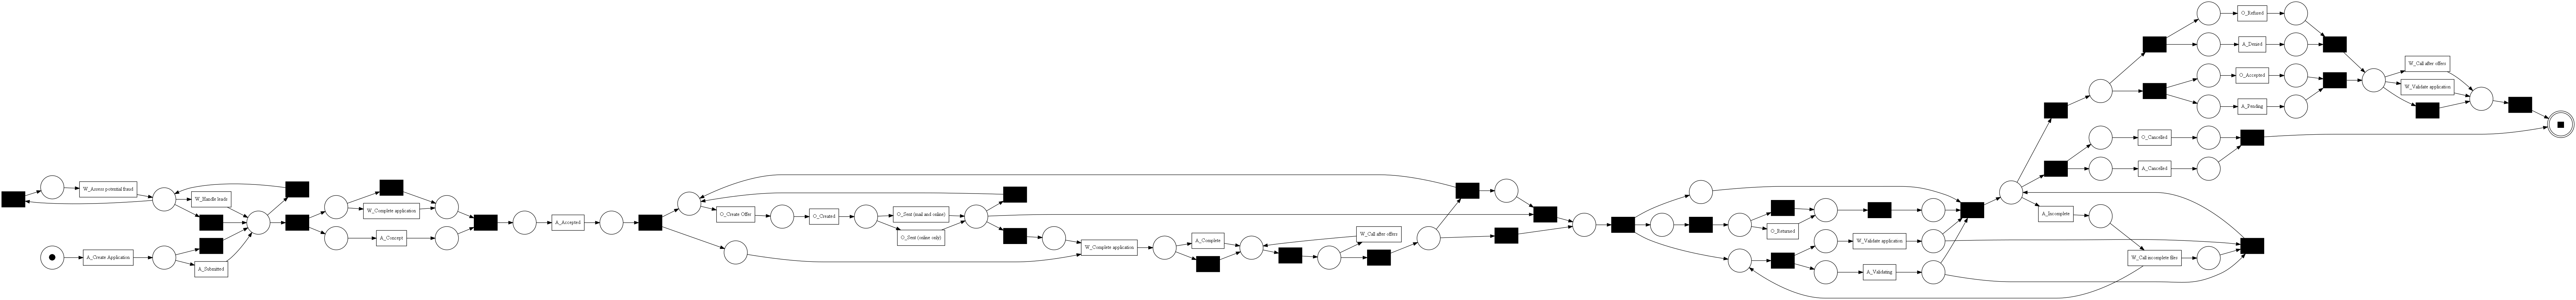

In [51]:
# View and export the Petri net
pm4py.write_pnml(net, initial_marking, final_marking, "./pnml/M_hand.pnml")
pm4py.view_petri_net(net, initial_marking, final_marking)

<font size="6">2g</font>

In [10]:
algos = [('alpha', ''), ('IM', 0), ('IM', 0.2), ('IM', 0.5)]
index_2g = []
result_2g = dict()
for algo, noise_threshold in algos:
    if algo == 'alpha':
        index_2g.append('Lf_alpha')
        net, im, fm = pm4py.discover_petri_net_alpha(log_filtered)
    else:
        index_2g.append(f"Lf_IM_{noise_threshold}")
        net, im, fm = pm4py.discover_petri_net_inductive(log_filtered, noise_threshold)
    
    pm4py.write_pnml(net, im, fm, f'./pnml/2g-Lf-{algo}-{noise_threshold}.pnml')
    fitness_dict = fitness_and_precision_calculator(net, im, fm, log_filtered)
    for key in fitness_dict:
        if key in result_2g:
            result_2g[key].append(fitness_dict[key])
        else:
            result_2g[key] = [fitness_dict[key]]
                
    simplicity, generalization = simplicity_and_generalization_calculator(net, im, fm, log_filtered)
    if 'simplicity' in result_2g:
        result_2g['simplicity'].append(simplicity)
    else:
        result_2g['simplicity'] = [simplicity]

    if 'generalization' in result_2g:
        result_2g['generalization'].append(generalization)
    else:
        result_2g['generalization'] = [generalization]

aligning log, completed variants ::   0%|          | 0/5846 [00:00<?, ?it/s]

computing precision with alignments, completed variants ::   0%|          | 0/44905 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/5846 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/44905 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/5846 [00:00<?, ?it/s]

aligning log, completed variants ::   0%|          | 0/5846 [00:00<?, ?it/s]

computing precision with alignments, completed variants ::   0%|          | 0/44905 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/5846 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/44905 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/5846 [00:00<?, ?it/s]

aligning log, completed variants ::   0%|          | 0/5846 [00:00<?, ?it/s]

computing precision with alignments, completed variants ::   0%|          | 0/44905 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/5846 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/44905 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/5846 [00:00<?, ?it/s]

aligning log, completed variants ::   0%|          | 0/5846 [00:00<?, ?it/s]

computing precision with alignments, completed variants ::   0%|          | 0/44905 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/5846 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/44905 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/5846 [00:00<?, ?it/s]

In [12]:
df_stats_2g = pd.DataFrame(result_2g, index=index_2g)
df_stats_2g

,perc_fit_trace (alignment),perc_fit_trace (token replay),average_fitness (alignment),average_fitness (token replay),precision (alignment),precision (token replay),simplicity,generalization
Lf_alpha,0.000000,0.000000,0.522125,0.631080,0.151920,0.151920,1.000000,0.990673
Lf_IM_0,100.000000,100.000000,1.000000,1.000000,0.179650,0.179650,0.600000,0.964891
Lf_IM_0.2,99.899917,99.899917,0.999948,0.999975,0.181051,0.181051,0.600000,0.967543
Lf_IM_0.5,8.886665,8.886665,0.908784,0.945580,0.278482,0.278482,0.607143,0.921731


<font size="6">2g</font>

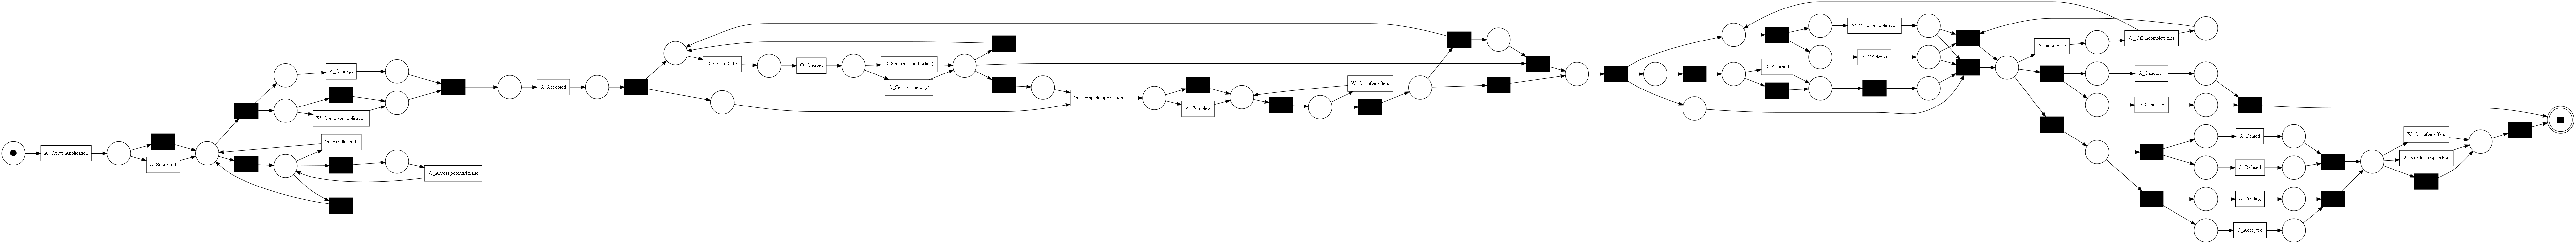

In [52]:
# Importing M_hand and M_auto models
net_hand, im_hand, fm_hand = pm4py.read_pnml('./pnml/M_hand.pnml')
net_auto, im_auto, fm_auto = pm4py.read_pnml('./pnml/M_auto.pnml')
pm4py.view_petri_net(net_hand, im_hand, fm_hand)

In [53]:
# Calculate fitness and precision
models = ['M_hand', 'M_auto']
cols = dict()
stat_hand = fitness_and_precision_calculator(net_hand, im_hand, fm_hand, log_filtered)
stat_hand

aligning log, completed variants ::   0%|          | 0/5846 [00:00<?, ?it/s]

computing precision with alignments, completed variants ::   0%|          | 0/44905 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/5846 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/44905 [00:00<?, ?it/s]

{'perc_fit_trace (alignment)': 5.601187189398122,
 'perc_fit_trace (token replay)': 0.0,
 'average_fitness (alignment)': 0.9002630670671612,
 'average_fitness (token replay)': 0.864635992784088,
 'precision (alignment)': 0.5913729764990645,
 'precision (token replay)': 0.7438243462951328}

In [54]:
stat_auto = fitness_and_precision_calculator(net_auto, im_auto, fm_auto, log_filtered)
stat_auto

aligning log, completed variants ::   0%|          | 0/5846 [00:00<?, ?it/s]

computing precision with alignments, completed variants ::   0%|          | 0/44905 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/5846 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/44905 [00:00<?, ?it/s]

{'perc_fit_trace (alignment)': 100.0,
 'perc_fit_trace (token replay)': 100.0,
 'average_fitness (alignment)': 1.0,
 'average_fitness (token replay)': 1.0,
 'precision (alignment)': 0.17965002684812081,
 'precision (token replay)': 0.17965002684812081}

In [55]:
for key in stat_hand:
    cols[key] = [stat_hand[key], stat_auto[key]]
df_stats_2h = pd.DataFrame(cols, index=models)
df_stats_2h

,perc_fit_trace (alignment),perc_fit_trace (token replay),average_fitness (alignment),average_fitness (token replay),precision (alignment),precision (token replay)
M_hand,5.601187,0.0,0.900263,0.864636,0.591373,0.743824
M_auto,100.000000,100.0,1.000000,1.000000,0.179650,0.179650
